<a href="https://colab.research.google.com/github/zah80/fullpack-ia-module-2-ML/blob/main/Test_Technique_en_Full_Pack_IA_Module_2_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Partie 1 — XGBoost pour prédire les défauts de paiement \**




**Étape 1 : Importation des bibliothèques**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

**Étape 2 : Importation des données**

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#Importer les données

# Use pd.read_excel instead of pd.read_csv for .xls files
data = pd.read_excel("/content/drive/MyDrive/default of credit card clients.xls", header=1)

In [38]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**Étape 3 : Preparation des données**

In [39]:
# Afficher les 5 premières lignes des données
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
# Afficher le nombre de lignes et de colonnes
data.shape

(30000, 25)

In [41]:
# Afficher les détails des colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

1 - Feature engineering (âge, montant, historique)

In [42]:
# 1. Nettoyage initial des données
# --------------------------------
# Suppression de la colonne ID (inutile)
data.drop(columns=["ID"], inplace=True)

# Regroupement des catégories rares (EDUCATION et MARRIAGE)
data["EDUCATION"] = data["EDUCATION"].replace({0: 4, 5: 4, 6: 4})  # Fusion des catégories rares sous "4 = autre"
data["MARRIAGE"] = data["MARRIAGE"].replace({0: 3})  # Fusion de 0 dans "3 = autre"

# 2. Création de nouvelles variables
# --------------------------------
# Historique de paiement
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data['TOTAL_LATE_PAYMENTS'] = data[pay_columns].apply(lambda x: sum(x > 0), axis=1)  # Nombre de retards
data['PAY_MEAN'] = data[pay_columns].mean(axis=1)  # Moyenne des retards (échelle -2 à 8)

# Comportement financier
data['TOTAL_BILL'] = data[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1)  # Dette totale
data['TOTAL_PAY'] = data[[f'PAY_AMT{i}' for i in range(1, 7)]].sum(axis=1)  # Remboursements totaux
data['DEBT_RATIO'] = data['TOTAL_BILL'] / (data['TOTAL_PAY'] + 1e-6)  # Ratio dette/remboursement

# Variables temporelles
data['AGE_GROUP'] = pd.cut(
    data['AGE'],
    bins=[20, 30, 40, 50, 60, 70],
    labels=['20-30', '30-40', '40-50', '50-60', '60-70']
)

# 3. Encodage des catégories
# --------------------------------
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP']
data = pd.get_dummies(data, columns=cat_features, drop_first=True)

# 4. Vérification finale
# --------------------------------
print(data[['TOTAL_LATE_PAYMENTS', 'DEBT_RATIO', 'TOTAL_BILL', 'TOTAL_PAY']].describe())
print(data.filter(regex='SEX|EDUCATION|MARRIAGE|AGE_GROUP').columns)  # Vérif des colonnes one-hot

       TOTAL_LATE_PAYMENTS    DEBT_RATIO    TOTAL_BILL     TOTAL_PAY
count         30000.000000  3.000000e+04  3.000000e+04  3.000000e+04
mean              0.834200  5.912055e+08  2.698617e+05  3.165139e+04
std               1.554303  1.751732e+10  3.795643e+05  6.082768e+04
min               0.000000 -3.880700e+10 -3.362590e+05  0.000000e+00
25%               0.000000  1.391811e+00  2.868800e+04  6.679750e+03
50%               0.000000  9.393916e+00  1.263110e+05  1.438300e+04
75%               1.000000  2.316806e+01  3.426265e+05  3.350350e+04
max               6.000000  2.171866e+12  5.263883e+06  3.764066e+06
Index(['SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2',
       'MARRIAGE_3', 'AGE_GROUP_30-40', 'AGE_GROUP_40-50', 'AGE_GROUP_50-60',
       'AGE_GROUP_60-70'],
      dtype='object')


2 - Gérer les valeurs manquantes

In [44]:
data.isnull().sum()

,0
LIMIT_BAL,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0
PAY_6,0
BILL_AMT1,0
BILL_AMT2,0


Aucune valeur manquante n’a été trouvée.

3 - Optimiser les hyperparamètres (max_depth, learning_rate, n_estimators)

In [45]:
# 1. Séparation des données
X = data.drop("default payment next month", axis=1)  # Features
y = data["default payment next month"]                # Target
# (X) et cible (y)
X = data.drop(columns=["default payment next month"])  # La cible est "default payment next month"
y = data["default payment next month"]

# 2. Split avec stratification (pour conserver la distribution des classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Optimisation avec GridSearchCV
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [50, 100, 200],
    "subsample": [0.8, 1.0]  # Ajouté pour améliorer la robustesse
}

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,                      # 5 folds pour une meilleure validation
    verbose=1,
    n_jobs=-1                  # Parallélisation
)
grid.fit(X_train, y_train)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [46]:
# 4. Résultats
best_model = grid.best_estimator_
print("Meilleurs hyperparamètres:", grid.best_params_)

Meilleurs hyperparamètres: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


4 - Importance des variables

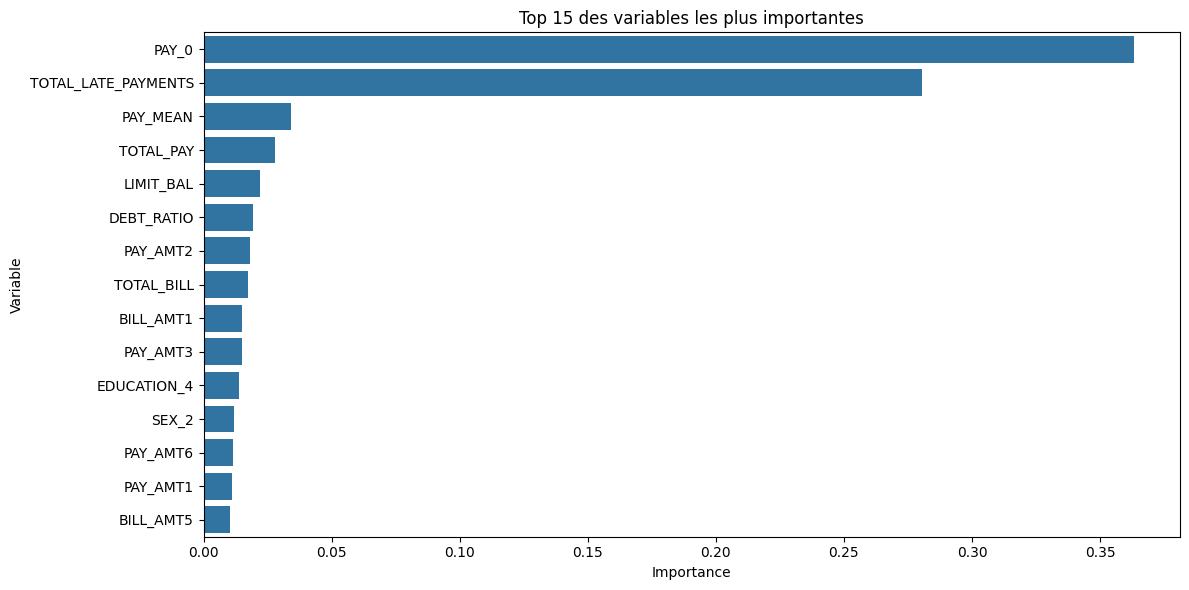

In [47]:
importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Now you can use importance_df for plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15)) # Use seaborn for barplot with DataFrame
plt.title("Top 15 des variables les plus importantes")
plt.xlabel("Importance")
plt.ylabel("Variable") # Added ylabel for clarity
plt.tight_layout()
plt.show()

5 - Évaluer avec AUC, F1

AUC : 0.780
F1 : 0.468


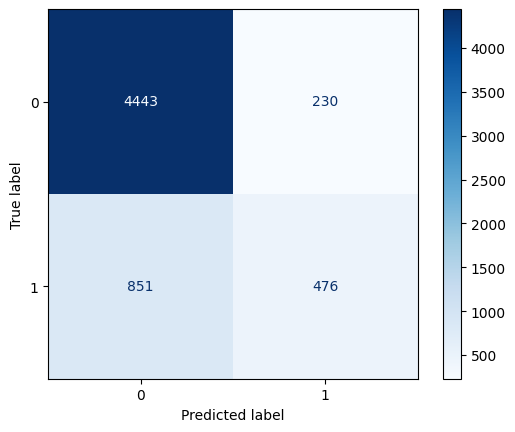

In [48]:
# Prédictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Métriques F1
print(f"AUC : {roc_auc_score(y_test, y_proba):.3f}")
print(f"F1 : {f1_score(y_test, y_pred):.3f}")

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

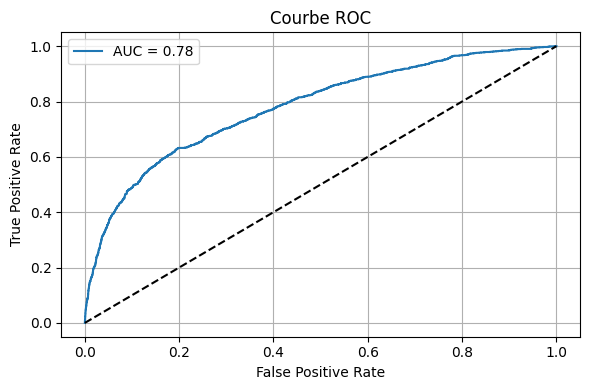

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC score and store it in a variable named 'auc'
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}') # Now 'auc' is defined
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Courbe ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**TASK 2 — SVM pour la classification de chiffres manuscrits**

Étape 1 : Importation des bibliothèques

In [50]:
# Importations des bib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import time

  Etape 2 :chargement du dataset

In [51]:
# Chargement des données
digits = load_digits()
X, y = digits.data, digits.target
print("Dimensions des données :", X.shape)

Dimensions des données : (1797, 64)


**1 - Réduire la dimension avec PCA**

Variance expliquée : 0.9590854042457148


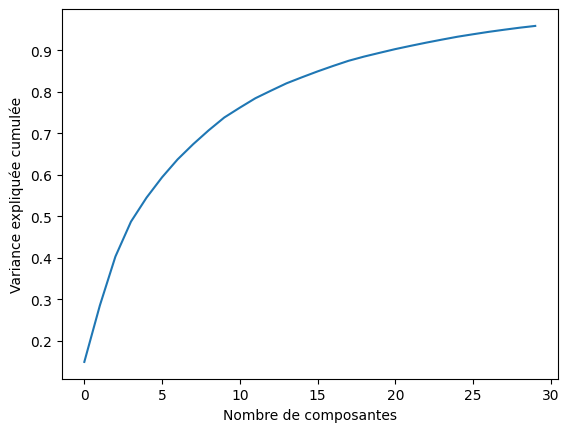

In [52]:
# Normalisation des données
X = X / 255.0  # MNIST est en niveaux de gris (0-255)

# Application de PCA pour réduire à 30 composantes (par exemple)
pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X)

# Variance expliquée
print("Variance expliquée :", np.sum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.show()

In [53]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

===> PCA : Réduction à 30 composantes tout en conservant > 95% de la variance.

**2 - Comparer kernel linéaire, RBF, poly**


In [54]:
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    print(f"\n--- Kernel: {kernel} ---")
    # Use time.time() to call the time function from the time module
    start_time = time.time()

    # Entraînement
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Métriques
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time # Also use time.time() here

    results[kernel] = {
        'accuracy': accuracy,
        'time': training_time
    }

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Temps d'entraînement: {training_time:.2f}s")

# Affichage des résultats
for kernel, metrics in results.items():
    print(f"{kernel.upper()}: Accuracy = {metrics['accuracy']:.3f}, Temps = {metrics['time']:.2f}s")


--- Kernel: linear ---
Accuracy: 0.875
Temps d'entraînement: 0.17s

--- Kernel: rbf ---
Accuracy: 0.986
Temps d'entraînement: 0.08s

--- Kernel: poly ---
Accuracy: 0.994
Temps d'entraînement: 0.07s
LINEAR: Accuracy = 0.875, Temps = 0.17s
RBF: Accuracy = 0.986, Temps = 0.08s
POLY: Accuracy = 0.994, Temps = 0.07s


===>

Le noyau linéaire (accuracy: 0.875) : offre une performance correcte mais limitée pour cette tâche de reconnaissance de chiffres, en raison de la nature non linéaire des données. Bien que rapide, il est moins adapté que les autres noyaux pour capturer des motifs complexes.

Le noyau RBF se distingue avec une excellente accuracy (0.986) : Son équilibre performance-temps en fait le choix optimal pour ce problème, permettant de modéliser efficacement les relations non linéaires sans surajustement notable.

Le noyau polynomial atteint la meilleure accuracy (0.994) : Bien que légèrement plus performant, il nécessite une validation rigoureuse du degré polynomial pour éviter le surajustement. Sa supériorité marginale par rapport au RBF peut ne pas justifier son utilisation systématique.

En fin on peut dire: le RBF constitue la solution la plus équilibrée, tandis que le polynomial peut être envisagé pour un gain de précision négligeable. Le linéaire reste utile pour des tests rapides ou des contraintes temporelles strictes.

**3 - Tester la scalabilité (temps d'entraînement)**

Taille 1000: 0.07s
Taille 5000: 0.10s
Taille 10000: 0.10s
Taille 1437: 0.11s


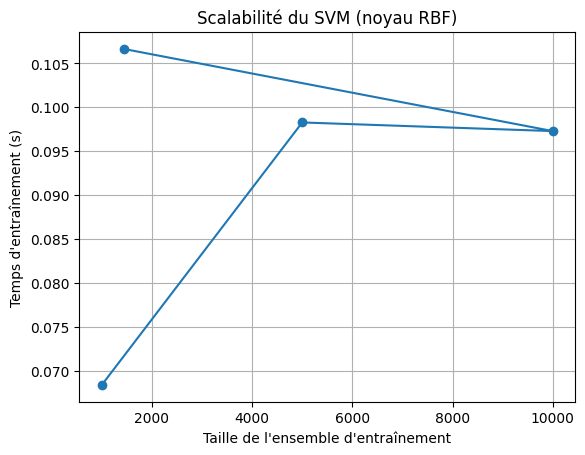

In [55]:
# Mesure du temps en fonction de la taille du dataset
sample_sizes = [1000, 5000, 10000, len(X_train)]  # MNIST: ajuster selon besoin
times = []

for size in sample_sizes:
    X_sample = X_train[:size]
    y_sample = y_train[:size]

    # Use time.time() to correctly call the function within the time module
    start_time = time.time()
    model = SVC(kernel='rbf').fit(X_sample, y_sample)
    times.append(time.time() - start_time) # Also correct the end time measurement
    print(f"Taille {size}: {times[-1]:.2f}s")

# Graphique
plt.plot(sample_sizes, times, 'o-')
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Temps d'entraînement (s)")
plt.title("Scalabilité du SVM (noyau RBF)")
plt.grid()
plt.show()

**4 - Visualiser les marges et erreurs**


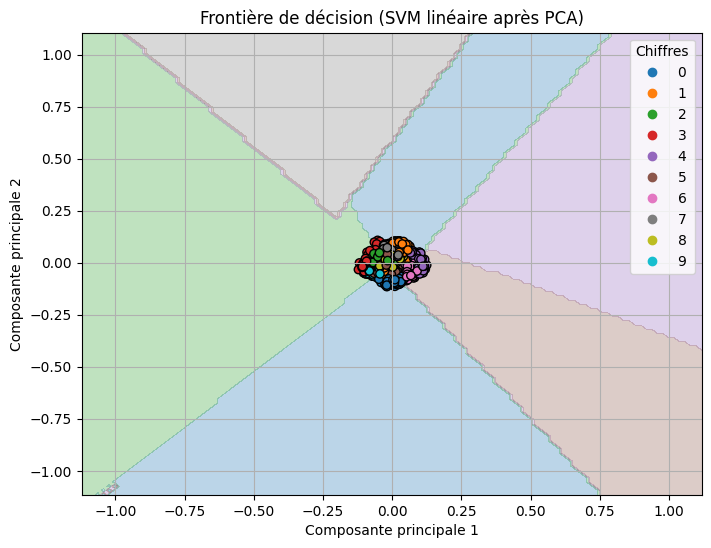

In [56]:
# Création d'une grille
h = .02  # step
# Corrected variable name from X_train_pca to X_train
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
# Corrected variable name from X_train_pca to X_train
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train a linear SVM specifically for plotting the decision boundary
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear', random_state=42)
clf_linear.fit(X_train[:, [0, 1]], y_train) # Fit only on the first two components for 2D plotting

# Prédiction sur la grille
# Corrected variable name from clf_linear to the newly trained linear model
Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
# Corrected variable name from X_train_pca to X_train, and select only the first two components
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab10', edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Chiffres")
plt.title("Frontière de décision (SVM linéaire après PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()

**TASK 3 — KMeans pour regrouper des clients en profils**

Étape 1 : Importation des bibliothèques

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Etape 2 :Chargement et nettoyage des données

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data1 = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [60]:
data1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [61]:
# Nettoyage :
data1.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [62]:


# Suppression des colonnes inutiles
data1.dropna(subset=['CustomerID'], inplace=True)  # Suppression des lignes avec des valeurs manquantes dans 'CustomerID'

# Optionnel : Conversion de la date
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'])


In [63]:
# Créer une nouvelle colonne pour le montant total dépensé dans le DataFrame original
data1['TotalSpent'] = data1['Quantity'] * data1['UnitPrice']

# Agréger les données par client
customer_data1 = data1.groupby('CustomerID').agg({
    'Quantity': 'sum',  # Quantité totale achetée
    'UnitPrice': 'mean',  # Prix moyen des produits achetés
    'InvoiceNo': 'nunique',  # Nombre de factures (fréquence des achats)
    'TotalSpent': 'sum'  # Total dépensé (en sommant la nouvelle colonne)
}).reset_index()

# Supprimer la ligne redondante qui calculait TotalSpent après l'agrégation
# customer_data1['TotalSpent'] = customer_data1['Quantity'] * customer_data1['UnitPrice']

In [64]:
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Étape 3 : Préparation des données pour le clustering

In [66]:
# Normalisation des données
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(customer_data1[['Quantity', 'UnitPrice', 'InvoiceNo', 'TotalSpent']])


1 - Choisir le bon nombre de clusters (méthode du coude + silhouette)

Méthode du coude

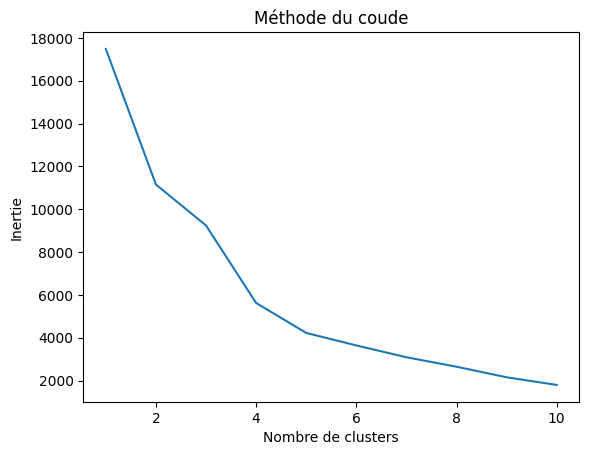

In [67]:
# Méthode du coude
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data1)
    inertia.append(kmeans.inertia_)

# Tracer la courbe de l'inertie
plt.plot(range(1, 11), inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


Score de silhouette

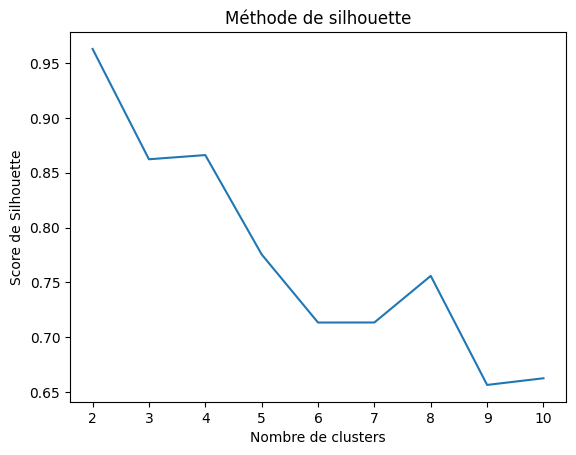

In [68]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data1)
    sil_scores.append(silhouette_score(scaled_data1, kmeans.labels_))

# Tracer la courbe de silhouette
plt.plot(range(2, 11), sil_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Silhouette')
plt.title('Méthode de silhouette')
plt.show()


2 - Analyser chaque cluster (profil client, panier, fréquence)

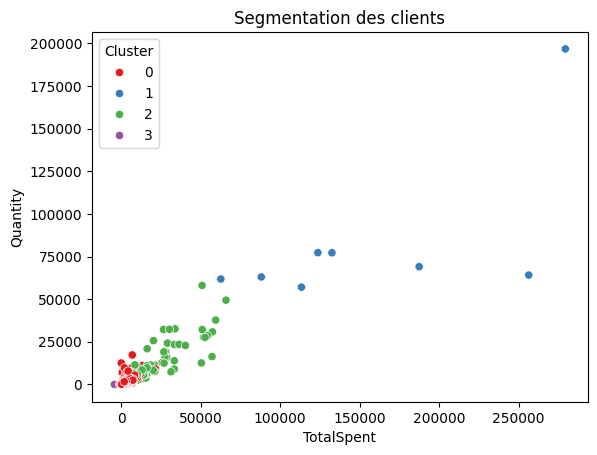

In [69]:
# Appliquer KMeans avec le nombre de clusters choisi (par exemple, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data1['Cluster'] = kmeans.fit_predict(scaled_data1)

# Visualiser les clusters
sns.scatterplot(x=customer_data1['TotalSpent'], y=customer_data1['Quantity'], hue=customer_data1['Cluster'], palette='Set1')
plt.title('Segmentation des clients')
plt.show()


3 - Réduire les dimensions (PCA ou t-SNE) pour visualiser

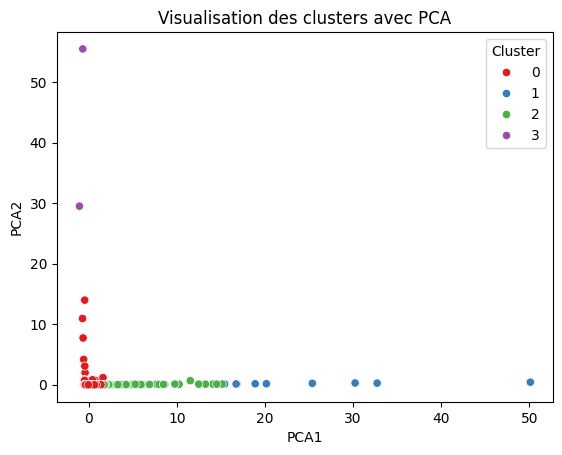

In [70]:
# Réduction de dimensions avec PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data1)

# Tracer les clusters dans le plan réduit
customer_data1['PCA1'] = principal_components[:, 0]
customer_data1['PCA2'] = principal_components[:, 1]

# Change data1=customer_data1 to data=customer_data1
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_data1, palette='Set1')
plt.title('Visualisation des clusters avec PCA')
plt.show()

4 - Interpréter les résultats et proposer des actions marketing

1-Cluster 0 (Rouge) :
Clients avec faible total dépensé et faible fréquence d'achats. Ce sont des clients occasionnels.
Action marketing : Offrir des promotions attractives et programmes de fidélité.

2-Cluster 1 (Bleu) :
Clients avec un panier moyen élevé, mais achats peu fréquents. Ce sont des clients premium.
Action marketing : Offrir des produits de luxe, ventes privées et service haut de gamme.

3-Cluster 2 (Vert) :
Clients avec comportement équilibré : achats réguliers et prix moyens. Ce sont des clients fidèles.
Action marketing : Lancer des programmes de fidélité et des réductions sur les achats fréquents.

4-Cluster 3 (Violet) :
Clients avec fréquence d'achat élevée, mais dépenses faibles. Ce sont des clients achetant des petits articles fréquemment.
Action marketing : Proposer des packs promotionnels, des réductions de volume et des produits complémentaires.

Conclusion :
La segmentation permet de personnaliser les actions marketing pour chaque groupe, optimisant ainsi les campagnes et augmentant la valeur client à long terme.